In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset='QM9'
#num_samples = [10, 50, 100, 500, 1000]
num_samples = np.arange(10, 1001, 100)
num_samples = list(num_samples)

In [3]:
import os
import time

def get_mol_number_baseline(f_name):
    return int(f_name.split('.')[0].split('_')[-1])

# return best, mean, worst
def summarize_results(results, s):
    if results.shape[0] < s:
        s = results.shape[0]
    return np.min(results[:s]), np.mean(results[:s]), np.max(results[:s])

def read_mols_baseline(folder):
    f_names = os.listdir(folder)
    mols_mmff, mols_uff  = {}, {}
    total_mol_count = 0
    total_conformer_count = []

    for s in num_samples:
        mols_mmff[s], mols_uff[s] = [], []
    
    total_mol_count = 0
    t1 = time.time()
    for f_i, f_name in enumerate(f_names):
        if f_i % 100 == 0:
            print ("done {}/{}".format(f_i, len(f_names)))
        mol_num = get_mol_number_baseline(f_name)
        mol = pkl.load(open(os.path.join(folder, f_name), 'rb'))
        if mol['mmff'].shape[0] == 0 or mol['uff'].shape[0] == 0:
            continue
        total_conformer_count.append(np.min([mol['mmff'].shape[0], mol['uff'].shape[0]]))
        for s in num_samples:
            mols_mmff[s].append(summarize_results(mol['mmff'], s))
            mols_uff[s].append(summarize_results(mol['uff'], s))
        total_mol_count += 1
    
    total_conformer_count = np.array(total_conformer_count)
    t2 = time.time()
    print ("time took {}".format(t2-t1))
    return mols_mmff, mols_uff, total_mol_count, total_conformer_count
    #print (fs[0:10])

    
mols_mmff, mols_uff, baseline_mol_count, baseline_conformer_count = read_mols_baseline('baselines_1k/{}/_test_'.format(dataset))

done 0/4829
done 100/4829
done 200/4829
done 300/4829
done 400/4829
done 500/4829
done 600/4829
done 700/4829
done 800/4829
done 900/4829
done 1000/4829
done 1100/4829
done 1200/4829
done 1300/4829
done 1400/4829
done 1500/4829
done 1600/4829
done 1700/4829
done 1800/4829
done 1900/4829
done 2000/4829
done 2100/4829
done 2200/4829
done 2300/4829
done 2400/4829
done 2500/4829
done 2600/4829
done 2700/4829
done 2800/4829
done 2900/4829
done 3000/4829
done 3100/4829
done 3200/4829
done 3300/4829
done 3400/4829
done 3500/4829
done 3600/4829
done 3700/4829
done 3800/4829
done 3900/4829
done 4000/4829
done 4100/4829
done 4200/4829
done 4300/4829
done 4400/4829
done 4500/4829
done 4600/4829
done 4700/4829
done 4800/4829
time took 6.313008069992065


In [4]:
import os
import time

# return best, mean, worst
def summarize_results(results, s):
    if results.shape[0] < s:
        s = results.shape[0]
    return np.min(results[:s]), np.mean(results[:s]), np.max(results[:s])

def read_mols_neuralnet(folder):
    f_names = os.listdir(folder)
    mols_neuralnet = {}
    total_mol_count = 0
    total_conformer_count = []

    for s in num_samples:
        mols_neuralnet[s] = []
    
    total_mol_count = 0
    t1 = time.time()
    for f_i, f_name in enumerate(f_names):
        if f_i % 100 == 0:
            print ("done {}/{}".format(f_i, len(f_names)))
        mol = pkl.load(open(os.path.join(folder, f_name), 'rb'))
        if mol['rmsd'].shape[0] == 0:
            continue
        total_conformer_count.append(mol['rmsd'].shape[0])
        for s in num_samples:
            mols_neuralnet[s].append(summarize_results(mol['rmsd'], s))
        total_mol_count += 1
    
    total_conformer_count = np.array(total_conformer_count)
    t2 = time.time()
    print ("time took {}".format(t2-t1))
    return mols_neuralnet, total_mol_count, total_conformer_count
    #print (fs[0:10])

    
mols_neuralnet, neuralnet_mol_count, neuralnet_conformer_count = read_mols_neuralnet('neuralnet_results/{}/_test_'.format(dataset))

done 0/5000
done 100/5000
done 200/5000
done 300/5000
done 400/5000
done 500/5000
done 600/5000
done 700/5000
done 800/5000
done 900/5000
done 1000/5000
done 1100/5000
done 1200/5000
done 1300/5000
done 1400/5000
done 1500/5000
done 1600/5000
done 1700/5000
done 1800/5000
done 1900/5000
done 2000/5000
done 2100/5000
done 2200/5000
done 2300/5000
done 2400/5000
done 2500/5000
done 2600/5000
done 2700/5000
done 2800/5000
done 2900/5000
done 3000/5000
done 3100/5000
done 3200/5000
done 3300/5000
done 3400/5000
done 3500/5000
done 3600/5000
done 3700/5000
done 3800/5000
done 3900/5000
done 4000/5000
done 4100/5000
done 4200/5000
done 4300/5000
done 4400/5000
done 4500/5000
done 4600/5000
done 4700/5000
done 4800/5000
done 4900/5000
time took 5.8958899974823


In [5]:
mols_mmff_plot, mols_uff_plot, mols_neuralnet_plot = {}, {}, {}
for s in num_samples:
    mols_mmff_plot[s] = np.median(mols_mmff[s], axis=0)
    mols_uff_plot[s] = np.median(mols_uff[s], axis=0)
    mols_neuralnet_plot[s] = np.median(mols_neuralnet[s], axis=0)


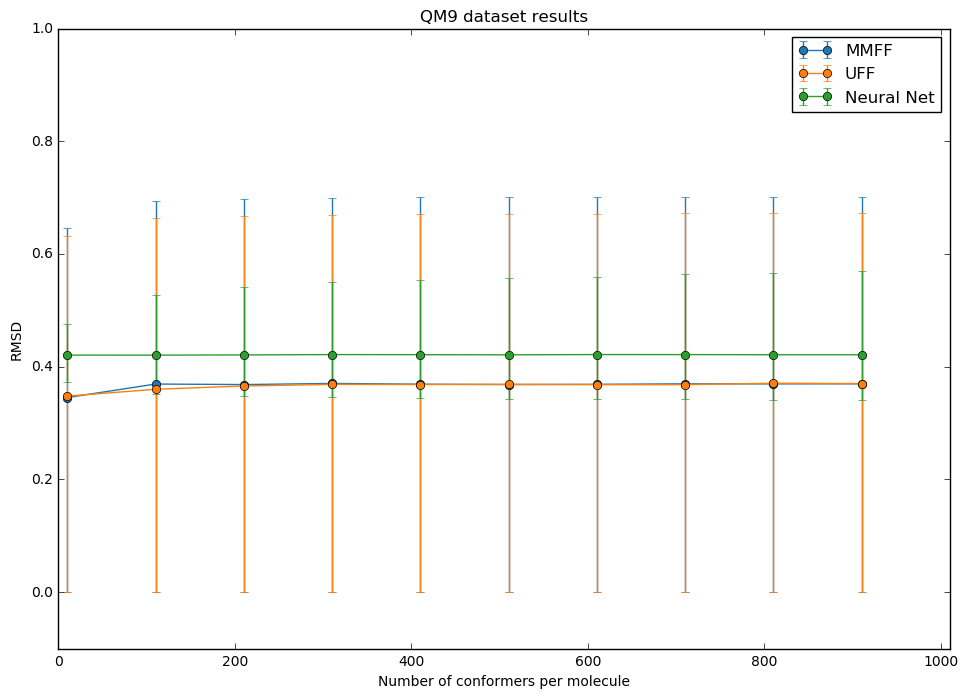

In [8]:
color_defaults = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'  # blue-teal
]

def get_data(results_plot):
    xs, lowers, medians, uppers = [], [], [], []
    for i, s in enumerate(num_samples):
        lower, median, upper = results_plot[s]
        lower = np.array(median) - np.array(lower)
        upper = np.array(upper) - np.array(median)
        xs.append(s)
        lowers.append(lower)
        medians.append(median)
        uppers.append(upper)
    return xs, lowers, medians, uppers

plt.figure(figsize=(11.5,8))

xs, lowers_mmff, medians_mmff, uppers_mmff = get_data(mols_mmff_plot)
_, lowers_uff, medians_uff, uppers_uff = get_data(mols_uff_plot)
_, lowers_neuralnet, medians_neuralnet, uppers_neuralnet = get_data(mols_neuralnet_plot)

lines = []
names = ["MMFF", "UFF", "Neural Net"]

lines.append(plt.errorbar(xs, medians_mmff, yerr=np.array([lowers_mmff, uppers_mmff]),
            fmt='-o', color=color_defaults[0]))
lines.append(plt.errorbar(xs, medians_uff, yerr=np.array([lowers_uff, uppers_uff]),
            fmt='-o', color=color_defaults[1]))
lines.append(plt.errorbar(xs, medians_neuralnet, yerr=np.array([lowers_neuralnet, uppers_neuralnet]),
            fmt='-o', color=color_defaults[2]))


plt.legend(lines, names, loc=1)
plt.xlim([0,1010])
if dataset == "COD":
    plt.ylim([-0.1, 3])
elif dataset == "QM9":
    plt.ylim([-0.1, 1.0])
plt.xlabel('Number of conformers per molecule')
plt.ylabel('RMSD')
plt.title("{} dataset results".format(dataset))
